In [12]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy

# data

In [13]:
check = pd.read_csv("task4.tsv", sep = "\t")

<AxesSubplot:xlabel='X1', ylabel='Y0'>

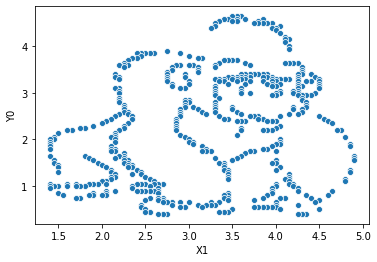

In [14]:
sns.scatterplot(x=check.X1, y=check.Y0)

In [15]:
X = check[["X1", "X2"]]

## unconstrained gradient descent

In [16]:
start = np.zeros(507)

In [17]:
def gradient_descent(y, y0, learn_rate=0.1, n_iter=50):
    for i in range(n_iter):
        gradient = 2*(y - y0)
        y = y - learn_rate*gradient
    return y

In [18]:
gradient_descent(start, check.Y0)

0      4.649934
1      4.649934
2      4.649934
3      4.599934
4      4.599934
         ...   
502    0.399994
503    0.399994
504    0.399994
505    0.399994
506    0.399994
Name: Y0, Length: 507, dtype: float64

# constrained gradient descent

## matrix of constraints

In [19]:
A = np.linalg.inv(X.transpose() @ X) @ X.transpose()

In [20]:
A

,0,1,2,3,4,5,6,7,8,9,...,497,498,499,500,501,502,503,504,505,506
0,0.001007,0.000881,0.000755,0.001638,0.001133,0.000881,0.000628,0.000502,0.001511,0.000881,...,0.000502,0.000376,-0.001642,-0.001768,0.002899,0.002773,0.002647,-0.001137,-0.001264,-0.001390
1,-0.001251,-0.000847,-0.000443,-0.003269,-0.001654,-0.000847,-0.000039,0.000365,-0.002866,-0.000847,...,0.000365,0.000768,0.007228,0.007632,-0.007307,-0.006903,-0.006499,0.005613,0.006017,0.006421


## orthonormal basis

In [21]:
Z = scipy.linalg.null_space(A)

In [22]:
pd.DataFrame(Z)

,0,1,2,3,4,5,6,7,8,9,...,495,496,497,498,499,500,501,502,503,504
0,-0.016150,-0.033710,-0.023676,-0.018659,-0.013642,-0.011133,-0.031202,-0.018659,-0.016150,-0.008625,...,-0.011133,-0.008625,0.031512,0.034021,-0.058796,-0.056287,-0.053779,0.021478,0.023986,0.026495
1,-0.044035,-0.043572,-0.043836,-0.043969,-0.044101,-0.044168,-0.043638,-0.043969,-0.044035,-0.044234,...,-0.044168,-0.044234,-0.045293,-0.045359,-0.042909,-0.042976,-0.043042,-0.045028,-0.045095,-0.045161
2,0.997927,-0.002299,-0.002170,-0.002105,-0.002040,-0.002008,-0.002267,-0.002105,-0.002073,-0.001975,...,-0.002008,-0.001975,-0.001458,-0.001425,-0.002623,-0.002590,-0.002558,-0.001587,-0.001555,-0.001522
3,-0.002319,0.997152,-0.002546,-0.002394,-0.002243,-0.002167,-0.002773,-0.002394,-0.002319,-0.002092,...,-0.002167,-0.002092,-0.000881,-0.000805,-0.003605,-0.003530,-0.003454,-0.001184,-0.001108,-0.001032
4,-0.002178,-0.002535,0.997669,-0.002229,-0.002127,-0.002076,-0.002484,-0.002229,-0.002178,-0.002025,...,-0.002076,-0.002025,-0.001210,-0.001160,-0.003044,-0.002993,-0.002942,-0.001414,-0.001363,-0.001312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,-0.002635,-0.003555,-0.003029,-0.002767,-0.002504,-0.002373,-0.003424,-0.002767,-0.002635,-0.002241,...,-0.002373,-0.002241,-0.000139,-0.000008,-0.004869,0.995263,-0.004606,-0.000665,-0.000534,-0.000402
503,-0.002600,-0.003476,-0.002976,-0.002725,-0.002475,-0.002350,-0.003351,-0.002725,-0.002600,-0.002225,...,-0.002350,-0.002225,-0.000222,-0.000097,-0.004728,-0.004603,0.995522,-0.000723,-0.000597,-0.000472
504,-0.001545,-0.001122,-0.001363,-0.001484,-0.001605,-0.001666,-0.001182,-0.001484,-0.001545,-0.001726,...,-0.001666,-0.001726,-0.002693,-0.002754,-0.000517,-0.000578,-0.000638,0.997548,-0.002512,-0.002572
505,-0.001510,-0.001043,-0.001310,-0.001443,-0.001576,-0.001643,-0.001110,-0.001443,-0.001510,-0.001710,...,-0.001643,-0.001710,-0.002776,-0.002842,-0.000377,-0.000443,-0.000510,-0.002509,0.997424,-0.002643


## coefficients

In [23]:
beta0 = np.array([[1], [0.9]])

## initial values for y

In [24]:
start = pd.Series(np.reshape(np.linalg.lstsq(A, beta0)[0], (507)))

<ipython-input-24-62b1223b6164>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  start = pd.Series(np.reshape(np.linalg.lstsq(A, beta0)[0], (507)))


## constrained gradient descent

In [25]:
def gradient_descent(y, y0, Z, learn_rate=0.1, n_iter=100):
    for i in range(n_iter):
        y = y - learn_rate * Z @ (Z.T @ (2 * (y - y0)))
    return y

In [26]:
result = gradient_descent(start, check.Y0, Z)

<AxesSubplot:xlabel='X1'>

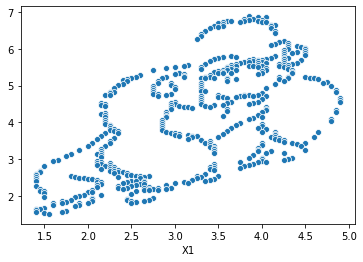

In [27]:
sns.scatterplot(x=check.X1, y=result)